# Arbeiten mit Text mit NLTK, Textblob und Spacy

Wenn ihr vorher Zeit habt installiert schon mal folgende Pakete:
- ```!pip3 install spacy```
- ```pip install -U textblob```
- ```pip install -U textblob-de```

In [2]:
#!pip3 install spacy
#!pip3 install -U textblob
#!pip3 install -U textblob-de

## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal
- Wordle 2.0

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [32]:
import nltk
from nltk.tokenize import word_tokenize

In [28]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,"""

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [6]:
#verfassung = verfassung.decode('utf-8')
verfassung

'\nIm Namen Gottes des Allmächtigen!\n\nDas Schweizervolk und die Kantone,"""\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [7]:
tokens = nltk.word_tokenize(verfassung)
tokens[0:20]

['Im',
 'Namen',
 'Gottes',
 'des',
 'Allmächtigen',
 '!',
 'Das',
 'Schweizervolk',
 'und',
 'die',
 'Kantone',
 ',',
 "''",
 "''",
 "''",
 'in',
 'der',
 'Verantwortung',
 'gegenüber',
 'der']

### In Wörter

In [6]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
#words

In [12]:
"Plotti".lower()

'plotti'

In [32]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()]
words[0:20]

['im',
 'namen',
 'gottes',
 'des',
 'allmächtigen',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kantone',
 'in',
 'der',
 'verantwortung',
 'gegenüber',
 'der',
 'schöpfung',
 'im',
 'bestreben',
 'den',
 'bund']

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [15]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences[1]

'Das Schweizervolk und die Kantone,"""\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:'

## Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich ja quasi das gleiche Wort - uns sind diese Deklinationen egal. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - ...

In [17]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [28]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:10]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the']

In [24]:
porter.stem("declare")

'declar'

In [19]:
[porter.stem(w) for w in engl_words][0:10]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für Deutsch

In [25]:
[lancaster.stem(w) for w in engl_words][0:10]

['univers',
 'decl',
 'of',
 'hum',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Snowball stemmer
- Geht okish für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [30]:
snowball = nltk.stem.snowball.GermanStemmer()

In [33]:
[lancaster.stem(w) for w in words][0:10]

['im',
 'nam',
 'got',
 'des',
 'allmächtig',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kanton']

## Lemmatizer
- Zurückführen des Wortes zu "Wörterbuchdefinitionen"

In [36]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]
(" ").join(words_engl[0:20])

'women in technologies areas are amazing at coding especially one woman is great her name is ursula burns'

In [37]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
(" ").join(lemmas[0:20])

[nltk_data] Downloading package wordnet to /Users/plotti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'woman in technology area are amazing at coding especially one woman is great her name is ursula burn'

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [38]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
#party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]
(" ").join(words_german[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

In [39]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
(" ").join(lemmas[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [9]:
#!pip2.7 install -U textblob --user
#!pip2.7 install -U --upgrade textblob-de --user

In [8]:
from textblob_de import TextBlobDE
from textblob_de import PatternParser

party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text = party_text.decode("UTF-8")
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
list(blob.words.lemmatize())[0:20]

[u'kurz',
 u'vor',
 u'22.00',
 u'Uhr',
 u'sein',
 u'Polizist',
 u'der',
 u'Stadtpolizei',
 u'in',
 u'all',
 u'Richtungen',
 u'aber',
 u'vor',
 u'all',
 u'in',
 u'Richtung',
 u'Kreis',
 u'9',
 u'ausger\xfcckt',
 u'Grund']

## Spacy German Lemmatizer 

- Spacy ist ein machine learning natural language processing tool. 
- Aufgrund des Deep Learning Ansatzes ist es am weitesten von allen derzeitigen Tools fortgeschritten. 
- Allerdings erschliessen sich viele Funktionen für Laien nicht sofort. Wir werden uns spacy morgen im detail anschauen. 

- ```pip install --user spacy```
- Deutsche Modelle runterladen:```pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-2.0.0/de_core_news_sm-2.0.0.tar.gz```
- oder ```python -m spacy download de_core_news_sm```

In [37]:
#!pip3 install spacy

In [ ]:
#!pip install treetaggerwrapper

In [2]:
!python -m spacy download de_core_news_sm


    Linking successful
    /Users/plotti/Library/Python/2.7/lib/python/site-packages/de_core_news_sm
    -->
    /Users/plotti/Library/Python/2.7/lib/python/site-packages/spacy/data/de_core_news_sm

    You can now load the model via spacy.load('de_core_news_sm')



In [3]:
import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp('''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. ''')
#doc = nlp('Die Schweizer Wirtschaft dürfte 2020 ein Wachstum von zwei Prozent verzeichnen, sagen die Datenschutzbeauftragten. '          'Dasselbe gilt für Versicherungsprämien und Aufwände der Krankenkassen im Allgemeinen. Auch die Bäume haben ein Problem.')
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['Kurz', 'vor', '22.00', 'Uhr', 'sein', 'Polizist', 'der', 'Stadtpolizei', 'in', 'all', 'Richtung', 'aber', 'vor', 'alle', 'in', 'Richtung', 'Kreis', '9', 'ausrücken', '.', 'Grund', 'sein', 'einen', 'Meldung', 'zu', 'einer', 'privat', 'Party', 'an', 'der', 'Aargauerstrasse', ',', 'der', 'angeblich', 'ausser', 'Kontrolle', 'geraten', 'sein', '.']


## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in spacy und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in spacy

In [6]:
party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text

'Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. \n'

In [7]:
verben = []
substantive = []
adjektive = []

import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp(party_text)

for token in doc:
    if "VERB" in token.pos_:
        verben.append(token)
    if "NOUN" in token.pos_:
        substantive.append(token)
    if "ADJ" in token.pos_:
        adjektive.append(token)

In [8]:
verben

[ausgerückt, geraten]

In [9]:
substantive

[Uhr,
 Polizisten,
 Stadtpolizei,
 Richtungen,
 Richtung,
 Kreis,
 Grund,
 Meldung,
 Party,
 Aargauerstrasse,
 Kontrolle]

In [10]:
adjektive

[Kurz, privaten, angeblich]

### POS tags in textblob

In [11]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

NameError: name 'TextBlobDE' is not defined

In [46]:
substantive

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausgerückt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [47]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [48]:
verben

['sind', 'war', 'geraten', 'sei']

# Stop word removal

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [15]:
#stopwords.words('english')[0:100]

In [16]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

['big', 'tree', 'duck']

### Deutsch

In [18]:
mylist = stopwords.words('german')
len(mylist)

232

### Eigene Stopwords hinzufügen oder entfernen

In [24]:
#tmp = stopwords.words('german')
# - ["ich"]
#tmp - ["ich"]

In [10]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
mylist = stopwords.words('german')
mylist.remove("aber")
mylist

['alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 '

In [48]:
a = ["plotti", "was", "was", "here"]
a.remove("plotti")

In [23]:

my_new_list = list(set(mylist)-set(["ich"]))
#my_new_list

In [25]:
mylist = stopwords.words('german')
mylist.append("Seite")
mylist.append("test")
mylist

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [26]:
words_german = ["ich", "war", "im", "wald", "spazieren", "Seite", "test"]
filtered_words = [word for word in words_german if word not in mylist]
filtered_words

['wald', 'spazieren']

# Wordle 2.0

- Tokenization
- Lemmatization

In [34]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
#text
# tokenize 
words = word_tokenize(text)
#words
# nur wörter behalten
words_german =[word.lower() for word in words if word.isalpha()]
words_german

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'das',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'das',
 'höchste',
 'streben',
 'des',
 'menschen',
 'gilt',
 'da',
 'es',
 'notwendig',
 'ist',
 'die',
 'mensche

In [36]:
# lemmatize
lemma = nltk.WordNetLemmatizer()
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas
#" ".join(clean_blob[:30])
clean_blob

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'da',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'da',
 'höchste',
 'streben',
 'de',
 'menschen',
 'gilt',
 'da',
 'e',
 'notwendig',
 'ist',
 'die',
 'menschenrec

- Numbers etc.. removal
- Stop word removal

In [37]:
from nltk.corpus import stopwords
# alle kleinmachen
words_alpha =[word.lower() for word in clean_blob if word.isalpha()]
#stopwords entfernen
stopwords = stopwords.words('german')
stopwords.append("jede")
stopwords.append("iii")
stopwords.append("a")
stopwords.append("a1")
stopwords.append("al")
stopwords.append("artikel")
result = [word for word in words_alpha if word not in stopwords]
result[0:20]
text = (" ").join(result)
text[:200]

'allgemeine erklärung menschenrechte resolution präambel anerkennung angeborenen gleichen unveräußerlichen rechte mitglieder gemeinschaft menschen grundlage freiheit gerechtigkeit frieden welt bildet n'

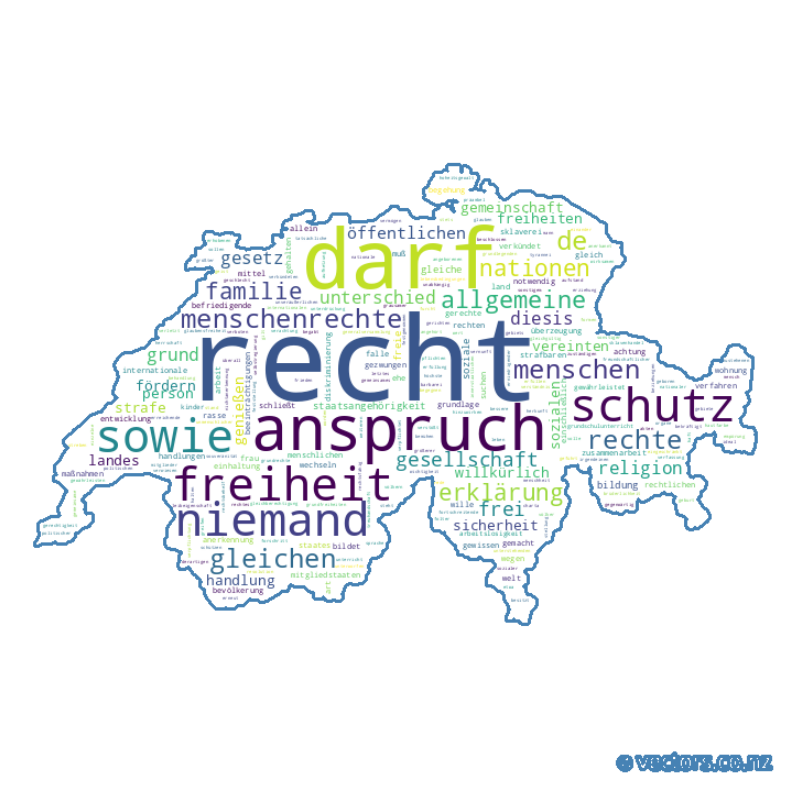

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=False, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

- Wenn man viele files hat und jedes verarbeiten möchte, kann man daraus eine funktion machen.  Wie z.B. hier:

In [67]:
result = []
def process_text(text):
    words = word_tokenize(text)
    words_german =[word.lower() for word in words if word.isalpha()]
    lemma = nltk.WordNetLemmatizer()
    lemmas = [lemma.lemmatize(i) for i in words_german]
    result = [word for word in lemmas if word not in stopwords]
    return result

#for file in files:
#    result.append(process_text(file))